# Assignment 4: Spam classification using Naïve Bayes

## Viktor Olsson (17 h) and Johan Wallgren (17 h)

In [9]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.regularizers import l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Preprocessing

1.

In [2]:
batch_size = 128 #number of samples before updating internal parameters.
num_classes = 10 
epochs = 10 #Number of passes through the whole dataset.

# input image dimensions
img_rows, img_cols = 28, 28 #28x28 pixel images.

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

The mnist data set is loaded in and split into training and test sets. The training and test sets are then reshaped to make sure that the images have the shape (28, 28, 1) if channel is last or (1, 28, 28) if channel is first. Then the training and test sets are made float in order to scale the images to the [0, 1] range. The scaling is done by dividing the data by 255. Finally the class vectors are converted to binary class matrices.

<!-- Why are we doing all these preprocessing steps? -->

### Defining the model

2.

#### A.

The model has 5 layers. These are one flatten function and 4 dense functions where 3 are ReLu and the 4th is softmax.

The first layer, flatten, has 28x28 = 784 neurons. This layer converts the 28x28 matrices to 784x1 vectors, since the dense layers requiers vector inputs. The second through fourth layers are dense layers with the ReLu activation functions. The layers have 125, 100, 50 neurons respectivly. This activation function is used to recognize handwritten symbols. The last layer is a dense layer with softmax activation function and contains 10 neurons. Softmax is used to get on node per class label in the model. The network is supposed to distinguish between 10 different symbols (numbers 0 to 9) and this is why there are 10 neurons in the output layer. The total number of parameters in the network is 116 285.

#### B.

The loss-function used in this neural network is the categorical cross entropy function.
<center><img src="img/CE.png"/></center>
This function will only take the "true" neuron and make the cross entropy calculation with that neuron. It will also only accept one correct class per sample.

#### C.

In [3]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(125, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(learning_rate = 0.1),
               metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4665 - accuracy: 0.8633 - val_loss: 0.2478 - val_accuracy: 0.9278
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1884 - accuracy: 0.9447 - val_loss: 0.1582 - val_accuracy: 0.9554
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1356 - accuracy: 0.9590 - val_loss: 0.1200 - val_accuracy: 0.9646
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1079 - accuracy: 0.9677 - val_loss: 0.1262 - val_accuracy: 0.9631
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0890 - accuracy: 0.9730 - val_loss: 0.1159 - val_accuracy: 0.9653
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.1118 - val_accuracy: 0.9651
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0890 - val_accuracy: 0.9726
Epoch 

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 125)               98125     
                                                                 
 dense_1 (Dense)             (None, 100)               12600     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 116,285
Trainable params: 116,285
Non-trainable params: 0
_________________________________________________________________


469/469 [==============================] - 4s 9ms/step - loss: 0.8130 - accuracy: 0.9567 - val_loss: 0.7450 - val_accuracy: 0.9605


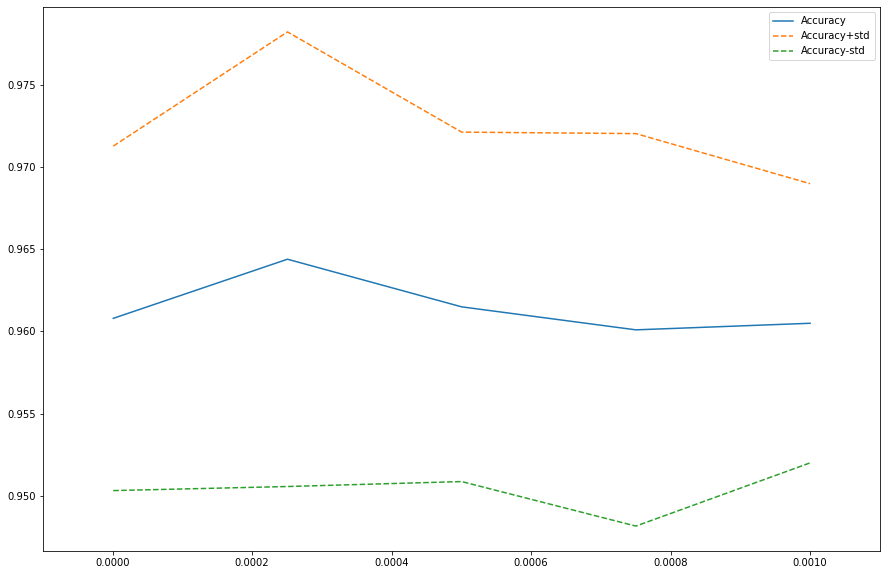

In [7]:
## Redefine model ##

batch_size = 128 #number of samples before updating internal parameters.
epochs = 1 #Number of passes through the whole dataset.
accuracy = []
std = []
factors = np.linspace(0.000001, 0.001,num=5)
for param in factors:
    scores = []
    ## Define model ##
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu', kernel_regularizer=l2(param)))
    model.add(Dense(300, activation = 'relu', kernel_regularizer=l2(param)))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.SGD(learning_rate = 0.1),
                   metrics=['accuracy'])
    for _ in range(3):
        fit_info = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        scores.append(score[1])
    accuracy.append(score[1])
    std.append(np.std(scores))
    
accuracy = np.array(accuracy)
std = np.array(std)
plt.figure(figsize=(15, 10))
plt.plot(factors,accuracy, label = 'Accuracy')
plt.plot(factors,accuracy+std,'--', label = 'Accuracy+std')
plt.plot(factors,accuracy-std, '--', label = 'Accuracy-std')
plt.xlim([-0.0001, 0.0011])
plt.legend()
plt.show()


### 3. Convolutional layers

#### A.

In [15]:
#Build the model as a cnn.
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"), #Maxpooling is an algorithm for downsizing
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5), #Dropout deactivates random nodes.
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)            

*Comment for layers*

* Pooling is used for summarizing the features found and for downsizing the data.
* Dropout is a technique where random nodes are selected and ignored during traning of the model to increase the models capablitlity of better generalization and to make it less likely to overfitt.

In [14]:
#Train the model.

batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # The optimizer Adam 
                                                                                       # (Adaptive Moment Estimation)

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 23s 54ms/step - loss: 0.0966 - accuracy: 0.9708 - val_loss: 0.0513 - val_accuracy: 0.9877
Epoch 2/10
422/422 [==============================] - 22s 53ms/step - loss: 0.0737 - accuracy: 0.9770 - val_loss: 0.0428 - val_accuracy: 0.9883
Epoch 3/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0380 - val_accuracy: 0.9907
Epoch 4/10
422/422 [==============================] - 24s 57ms/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0352 - val_accuracy: 0.9903
Epoch 5/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0519 - accuracy: 0.9831 - val_loss: 0.0306 - val_accuracy: 0.9922
Epoch 6/10
422/422 [==============================] - 23s 54ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0333 - val_accuracy: 0.9905
Epoch 7/10
422/422 [==============================] - 22s 52ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0327 - val_accuracy:

*Comment for optimizer and validation split*

* The optimizer ADAM (Adaptive Moment Estimation), is an method that computes the adaptive learning rate for each parameter.
* Validation split, splits the training set by proportion to the argument and uses that part to validate after each epoch is finished.

In [13]:
#Evaluate the model.

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06731502711772919
Test accuracy: 0.9797000288963318


#### B.